<a href="https://colab.research.google.com/github/leonardo-toffalini/szgepes25-hf/blob/main/hf_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feladat
Szimuláljunk különböző elemszámú mintákat a következő eloszlásból:
$$P(X=1)=p,\; P(X=2)=3p,\; P(X=3)=1-4p$$ ($0 < p < 1/4$ az ismeretlen paraméter).

Vizsgájuk meg a $p$ különböző becsléseit, melyik a jobb?

(Ötlet: induljunk ki a különböző értékek relatív gyakoriságaiból.)

## Megoldás
1. Szimuláljuk a diszkrét eloszlást.
2. Ábrázoljuk hisztogrammon a szimulált mintát.
3. Becslést adunk $p$ értékére az $X_i = 1$ minták relatív gyakoriságával.

In [1]:
library(ggplot2)

In [2]:
values <- c(1, 2, 3)
p <- 0.13
probs <- c(p, 3 * p, 1 - 4 * p)
n = 1000

samples_discrete <- sample(values, size = n, replace = TRUE, prob = probs)

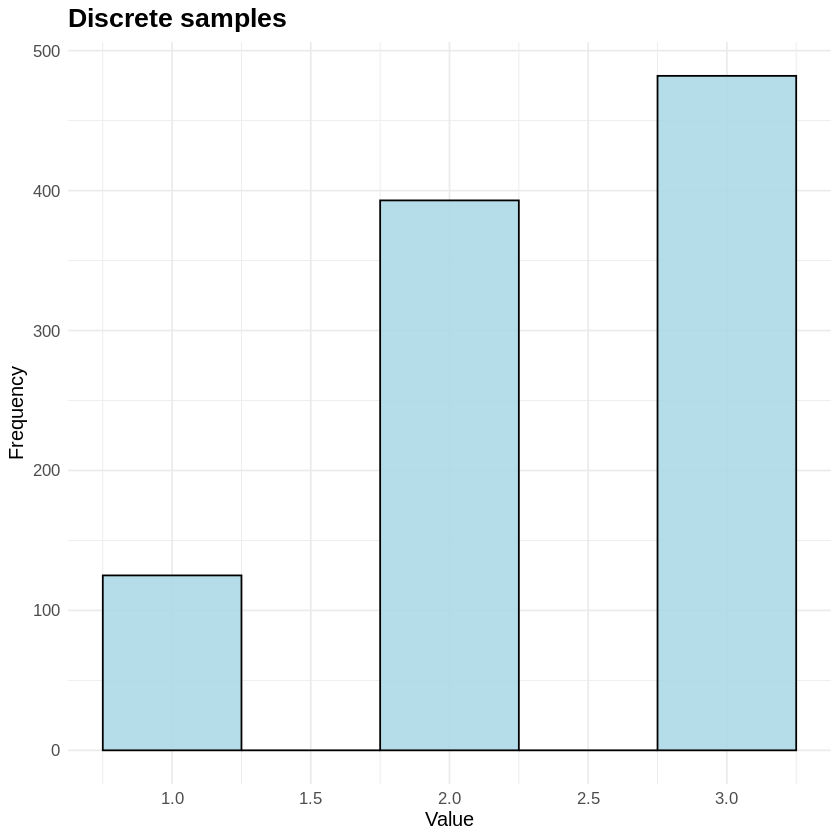

In [3]:
ggplot(data.frame(x = samples_discrete), aes(x)) +
  geom_histogram(bins=5, fill="lightblue", color="black", alpha=0.9) +
  labs(title="Discrete samples",
       x="Value",
       y="Frequency") +
  theme_minimal() +
  theme(
    plot.title=element_text(size=16, face="bold"),
    axis.title=element_text(size=12),
    axis.text=element_text(size=10)
  )

In [4]:
rel_samples <- table(samples_discrete) / n
rel_samples

samples_discrete
    1     2     3 
0.125 0.393 0.482 

In [5]:
p_hat = rel_samples[[1]]
p_hat

[1] 0.125

### Bónusz
Összecsomagoljuk a minták szimulálását és a paraméter becslését, és megnézzük hogyan változik a becslés ahogyan nő a minta elemszám.

In [6]:
simulate_data <- function(p, n) {
  values = c(1, 2, 3)
  probs = c(p, 3 * p, 1 - 4 * p)

  samples_discrete = sample(values, size = n, replace = TRUE, prob = probs)
  rel_samples = table(samples_discrete) / n
  p_hat = rel_samples[[1]]

  return (p_hat)
}


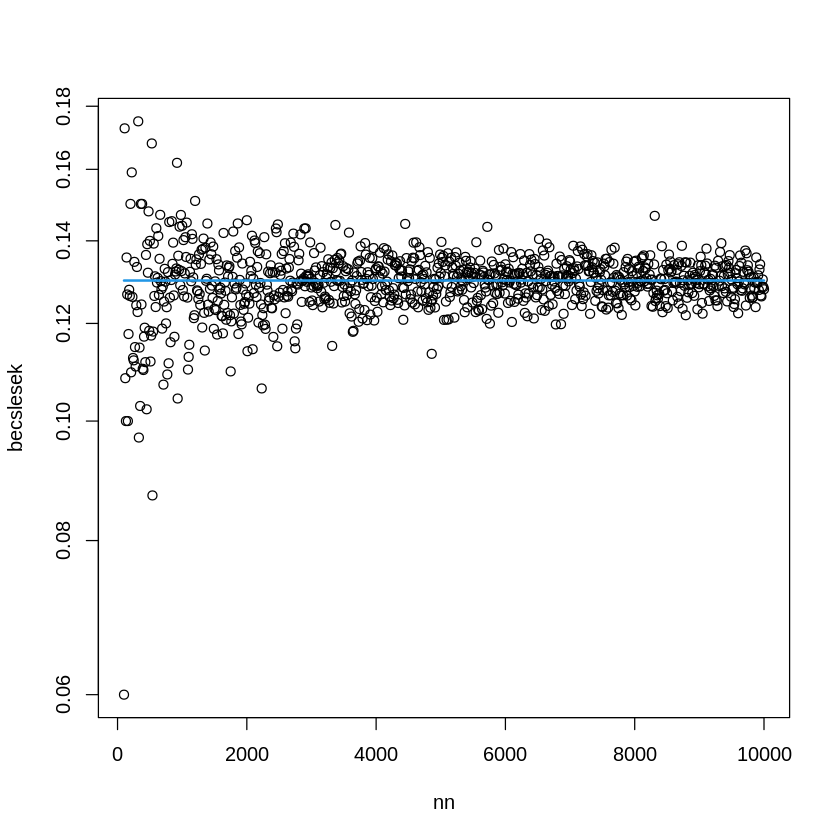

In [7]:
p = 0.13
nn = c(10:1000) * 10
becslesek = nn

for (i in 1:length(nn)) {
  becslesek[i] = simulate_data(p, nn[i])
}

plot(nn, becslesek, log="y")
lines(nn, rep(p, times=length(nn)), col=4, lwd=2)